# Using Silhouette Analysis to See Clusters

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

sys.path.append(r'../atm_demand')
from feature_generation import *

In [2]:
df = pd.read_csv("../atm_demand/DATA_sample_atm.csv")
all_atms_feature_set = get_all_atms_feature_set(df, first_n = 500)

In [3]:
def draw_silhouette(clustering_df, range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(clustering_df) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=20)
        cluster_labels = clusterer.fit_predict(clustering_df)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(clustering_df, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(clustering_df, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(clustering_df.iloc[:, 0], clustering_df.iloc[:, 1], marker='.', s=100, lw=0, alpha=1,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

    plt.show()

## Day_of_the_Week_Index Clustering

For n_clusters = 2 The average silhouette_score is : 0.3278643949904948
For n_clusters = 3 The average silhouette_score is : 0.25621887689196504
For n_clusters = 4 The average silhouette_score is : 0.21533338294210339
For n_clusters = 5 The average silhouette_score is : 0.23622941892509505
For n_clusters = 6 The average silhouette_score is : 0.21436634800934068
For n_clusters = 7 The average silhouette_score is : 0.19255097859793982
For n_clusters = 9 The average silhouette_score is : 0.18716170428184858
For n_clusters = 10 The average silhouette_score is : 0.18784527002225143
For n_clusters = 19 The average silhouette_score is : 0.15748136012341443
For n_clusters = 20 The average silhouette_score is : 0.16369691991412463


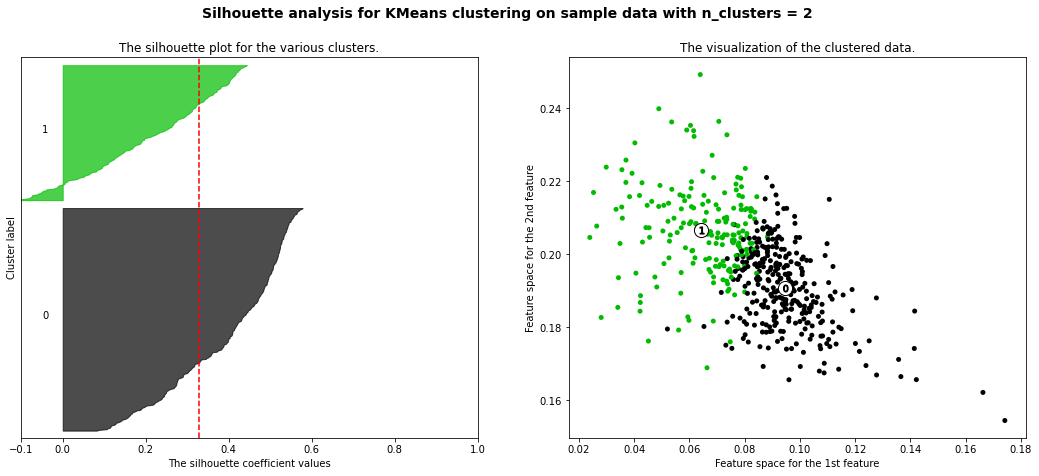

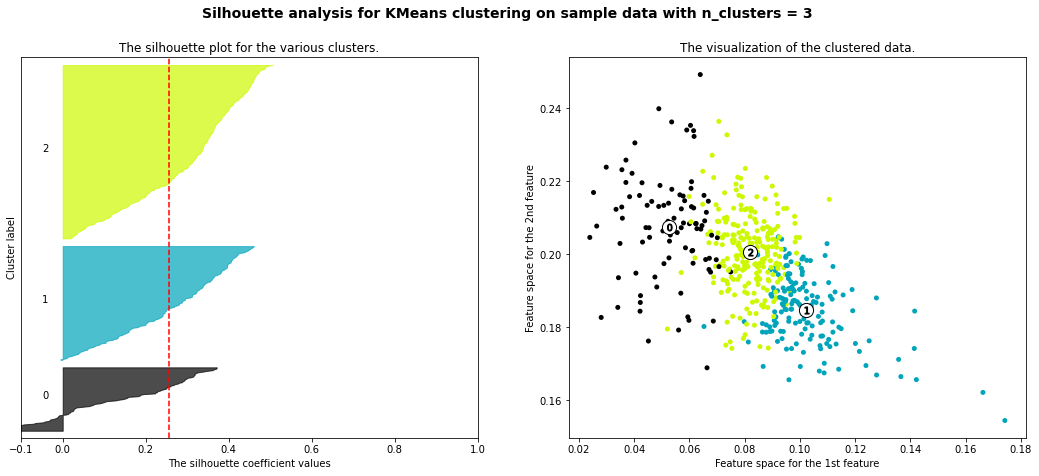

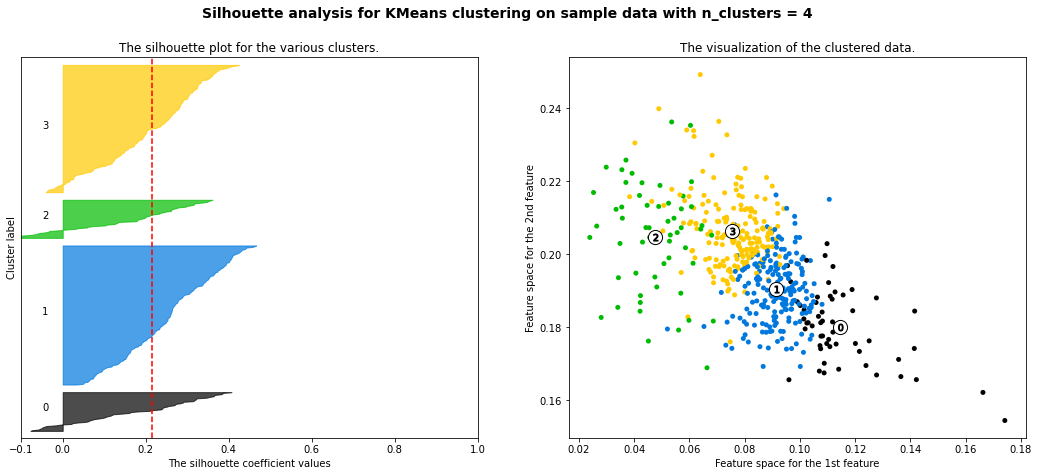

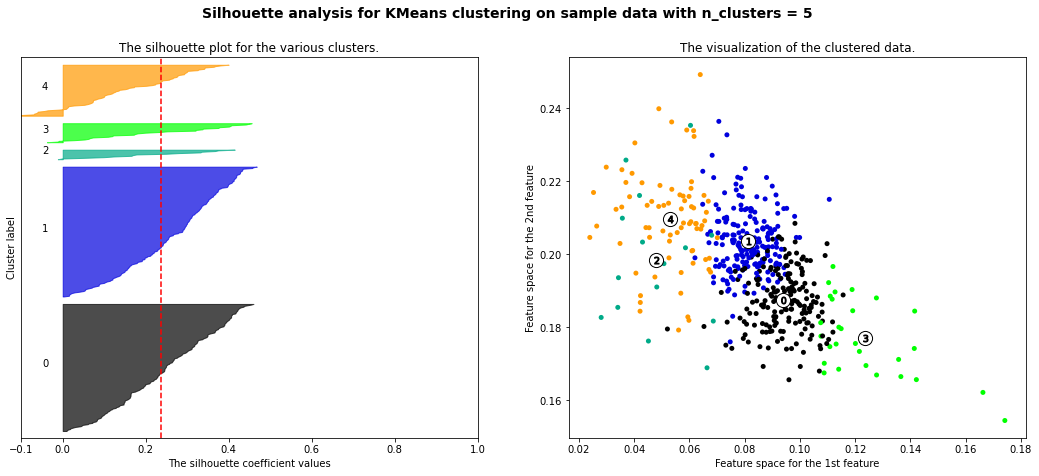

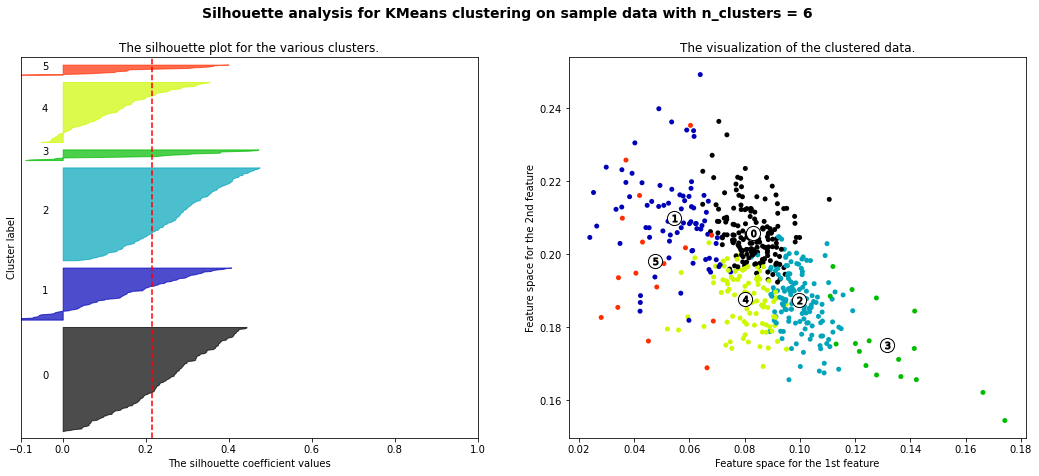

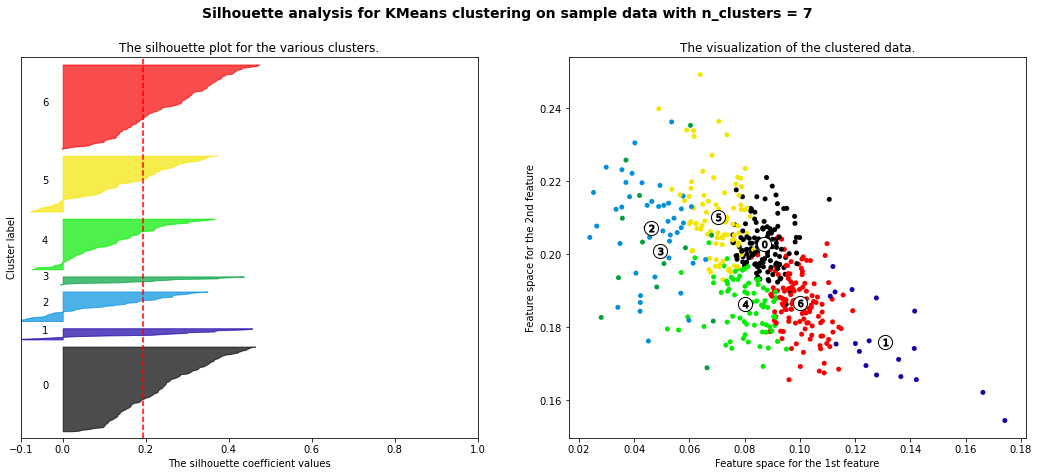

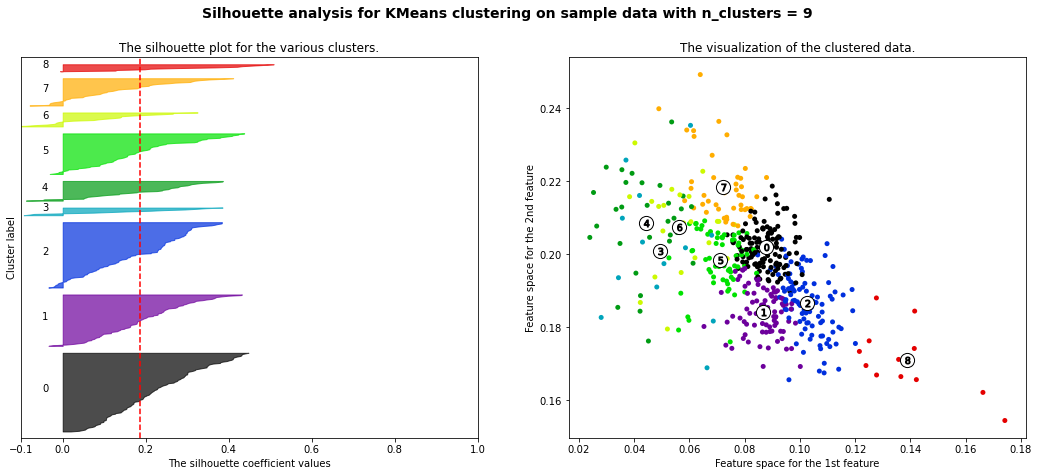

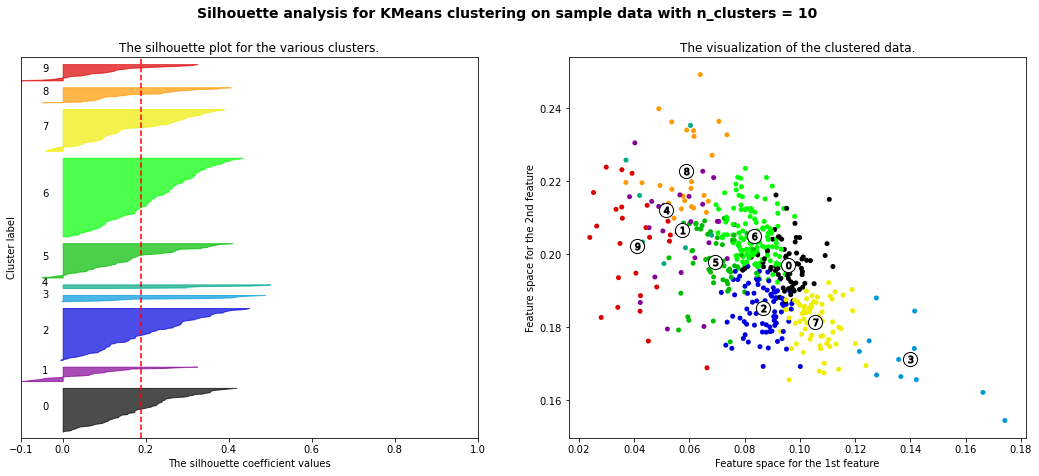

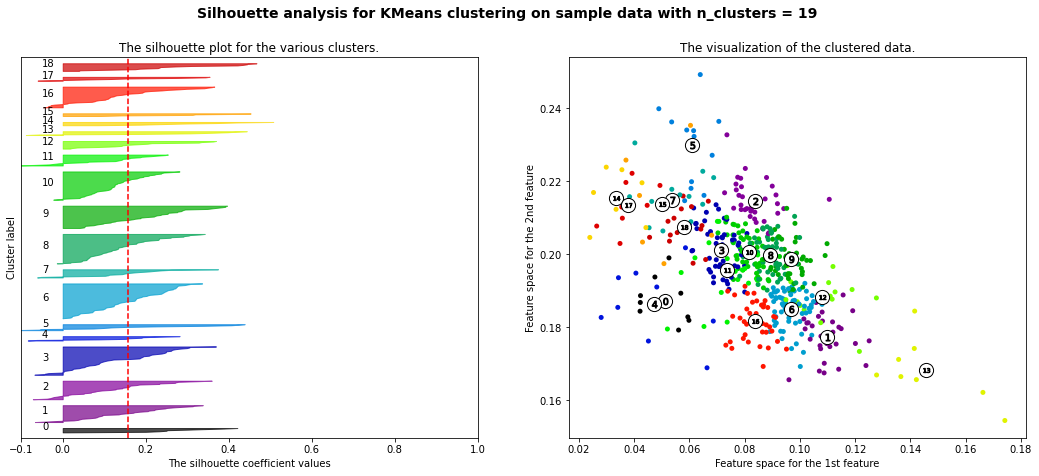

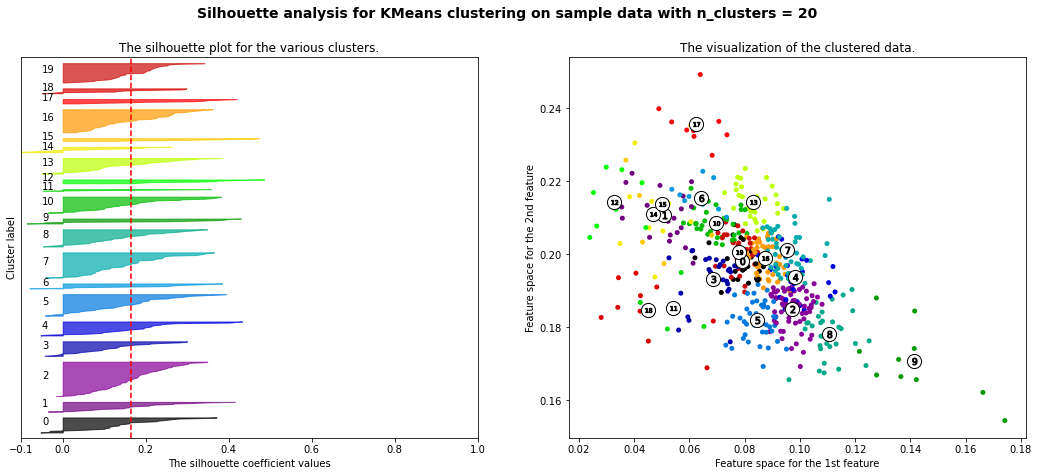

In [4]:
clustering_df = get_clustering_df(all_atms_feature_set, 'Day_of_the_Week_Index', 'CashIn')
range_n_clusters = list(range(2,8)) + list(range(9,11)) + list(range(19,21))
draw_silhouette(clustering_df, range_n_clusters)

## Month_of_the_Year_Index Clustering

For n_clusters = 2 The average silhouette_score is : 0.7233980387559387
For n_clusters = 3 The average silhouette_score is : 0.21923043912808207
For n_clusters = 4 The average silhouette_score is : 0.18172757079511687
For n_clusters = 5 The average silhouette_score is : 0.15100165899447412
For n_clusters = 6 The average silhouette_score is : 0.13769237041535076
For n_clusters = 7 The average silhouette_score is : 0.13080068182956028
For n_clusters = 9 The average silhouette_score is : 0.11717503976192158
For n_clusters = 10 The average silhouette_score is : 0.09693913417312325
For n_clusters = 19 The average silhouette_score is : 0.07666285047528495
For n_clusters = 20 The average silhouette_score is : 0.07419767958373989


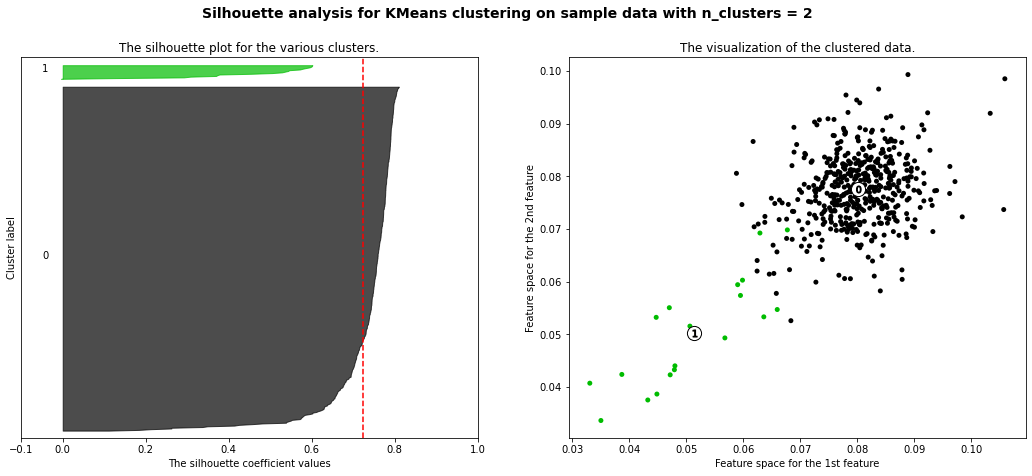

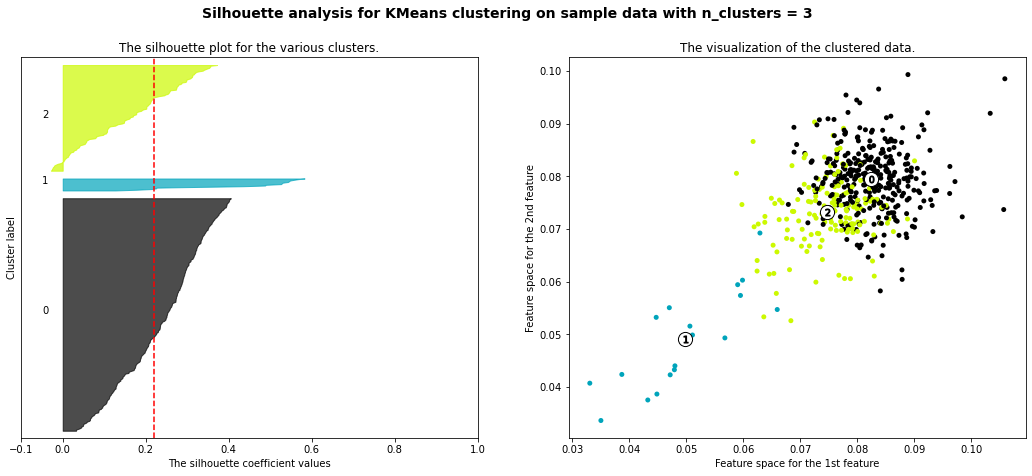

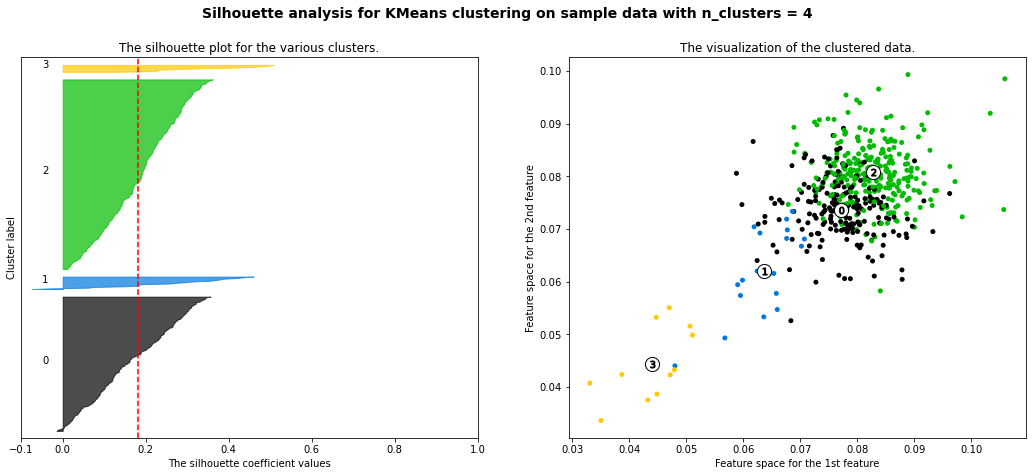

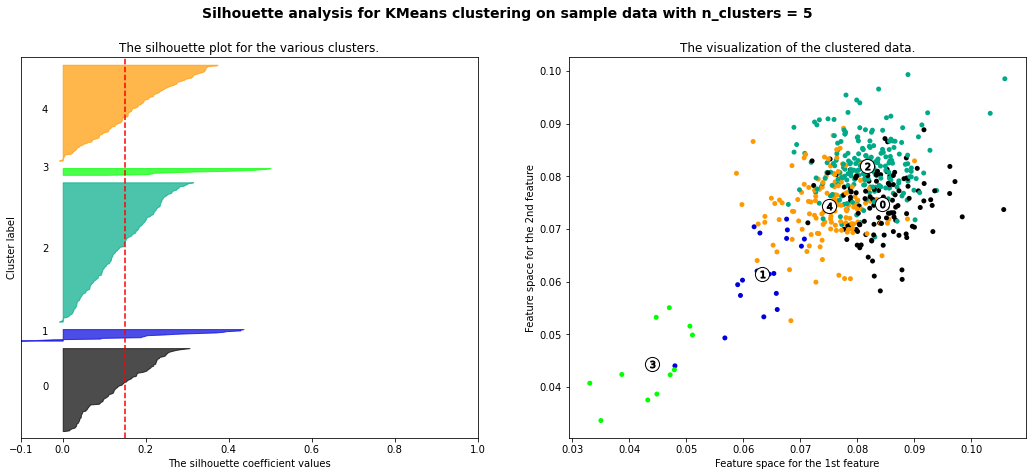

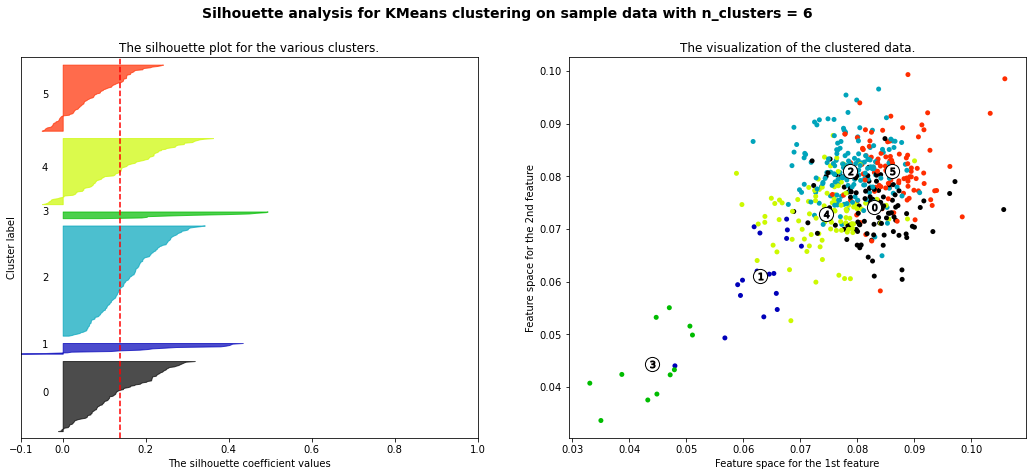

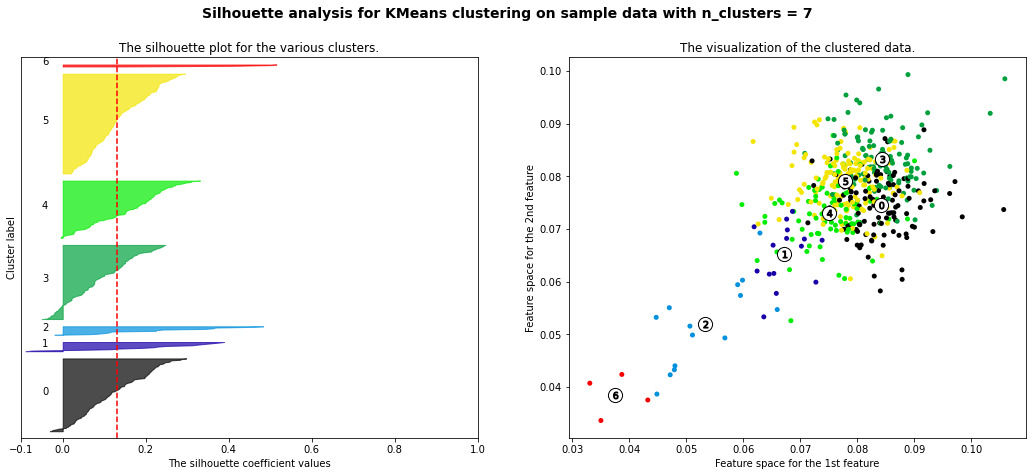

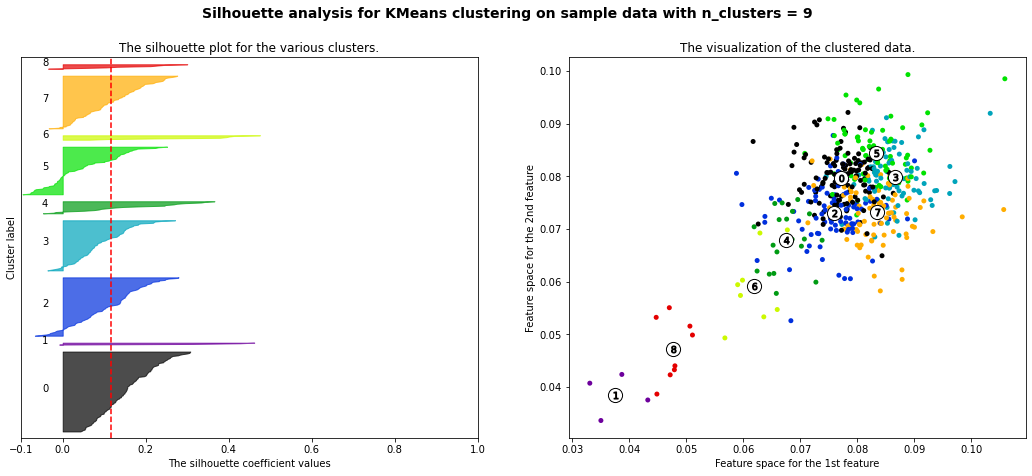

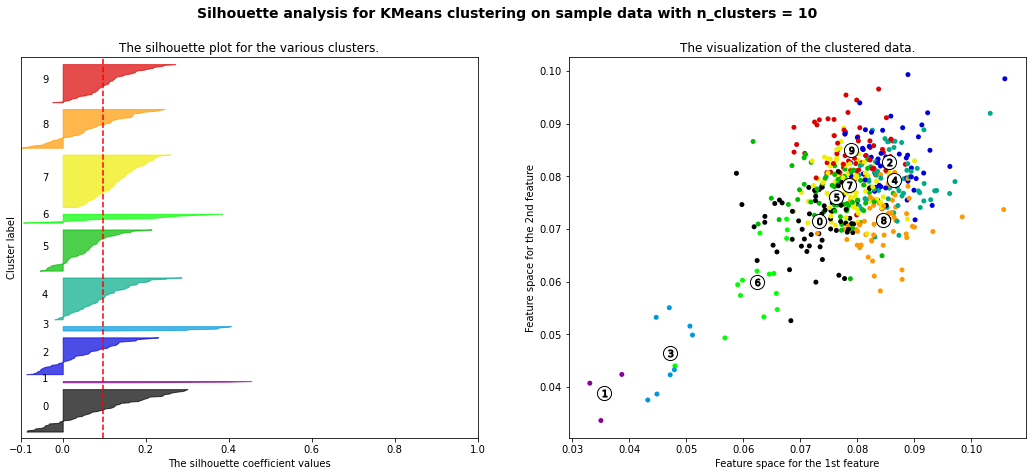

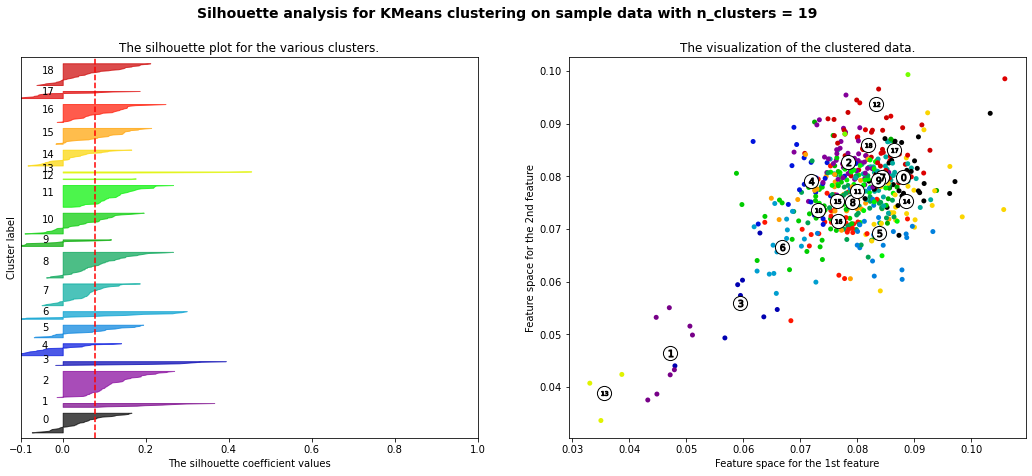

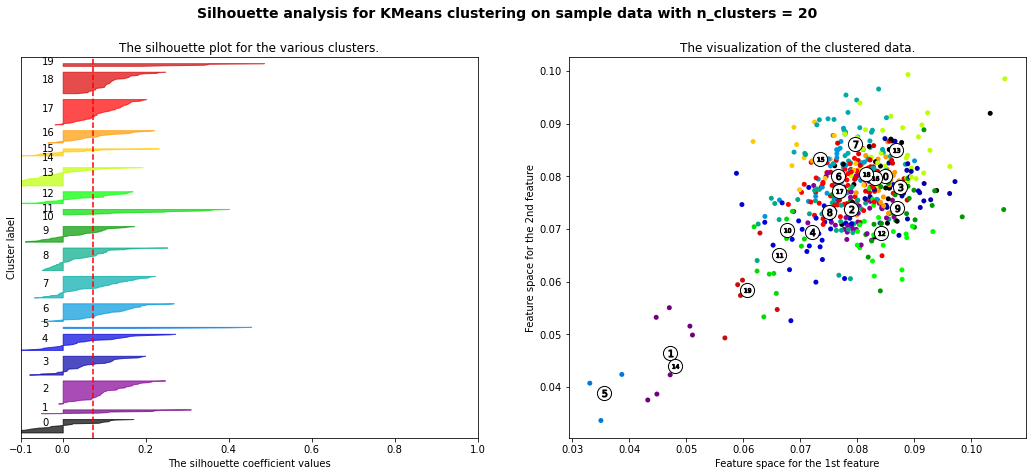

In [5]:
clustering_df = get_clustering_df(all_atms_feature_set, 'Month_of_the_Year_Index', 'CashIn')
range_n_clusters = list(range(2,8)) + list(range(9,11)) + list(range(19,21))
draw_silhouette(clustering_df, range_n_clusters)

## Special_Lunar_Dates_Index Clustering

For n_clusters = 2 The average silhouette_score is : 0.3161701530635345
For n_clusters = 3 The average silhouette_score is : 0.2873069064660459
For n_clusters = 4 The average silhouette_score is : 0.23429952367068607
For n_clusters = 5 The average silhouette_score is : 0.22219198355149378
For n_clusters = 6 The average silhouette_score is : 0.21706156242390812
For n_clusters = 7 The average silhouette_score is : 0.20531794564483544
For n_clusters = 9 The average silhouette_score is : 0.20498717412215164
For n_clusters = 10 The average silhouette_score is : 0.1965440218828661
For n_clusters = 19 The average silhouette_score is : 0.19144789022832942
For n_clusters = 20 The average silhouette_score is : 0.1977458973162081


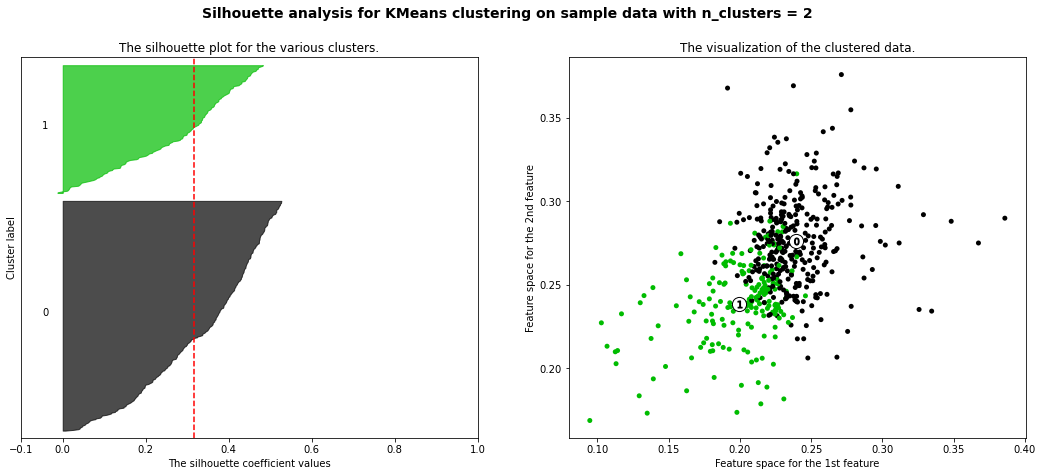

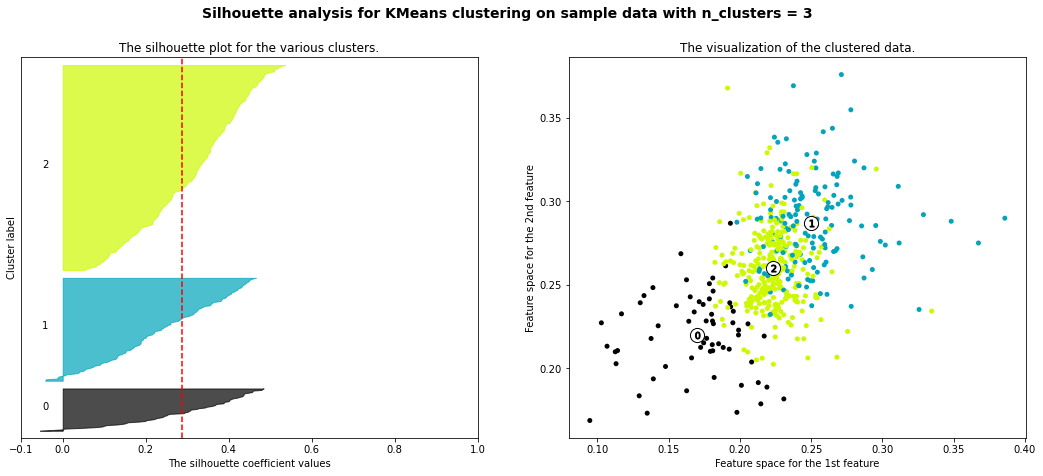

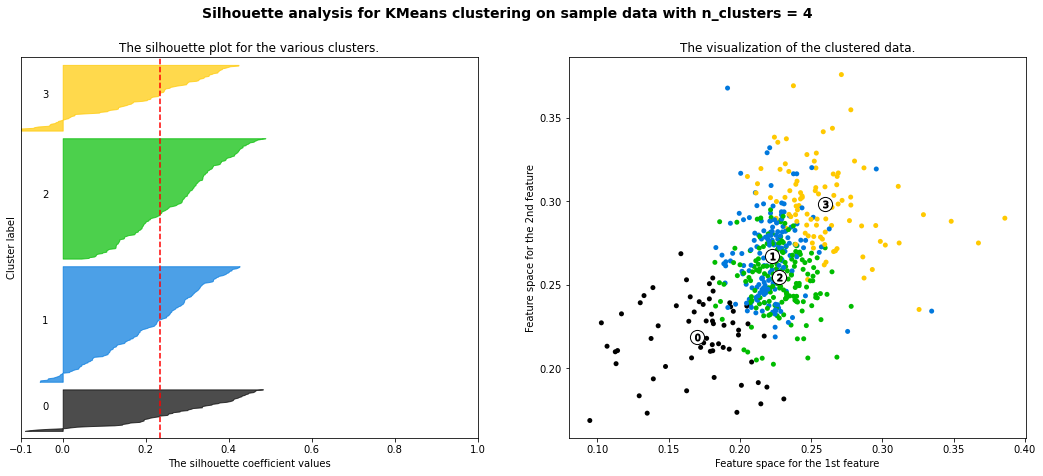

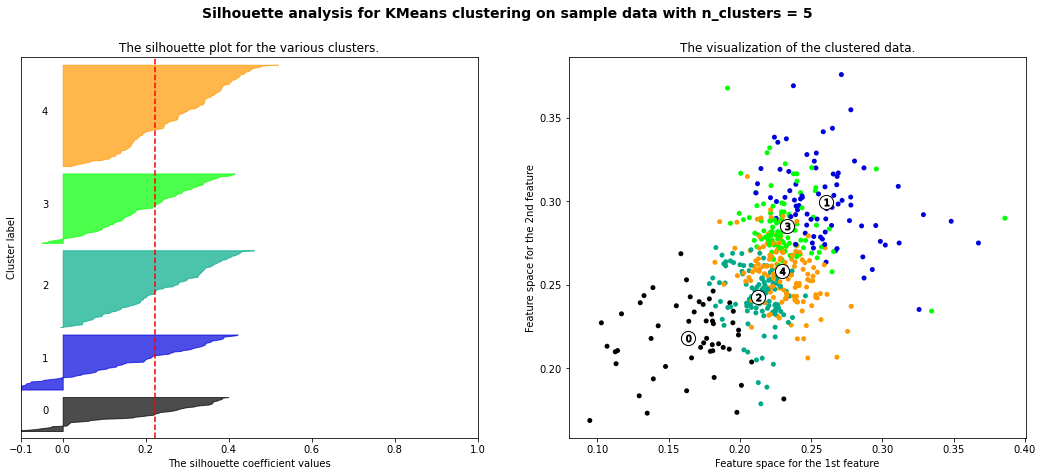

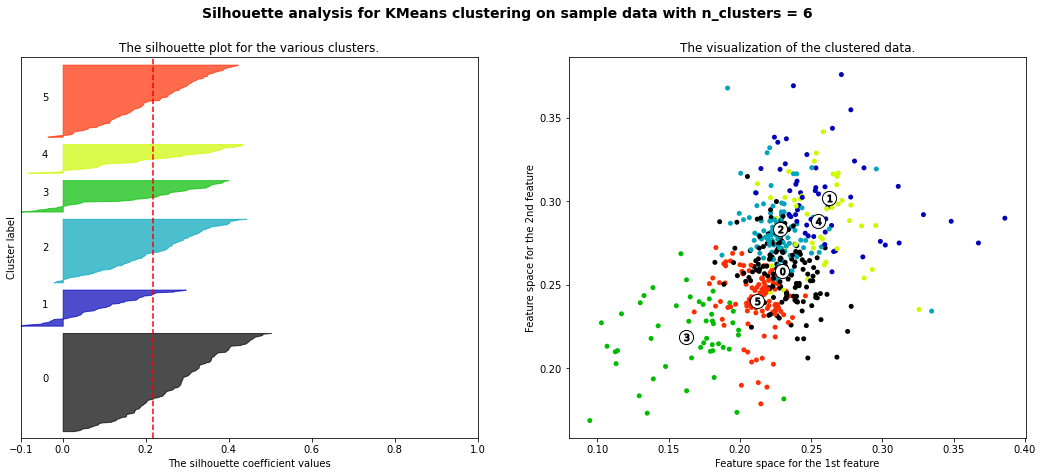

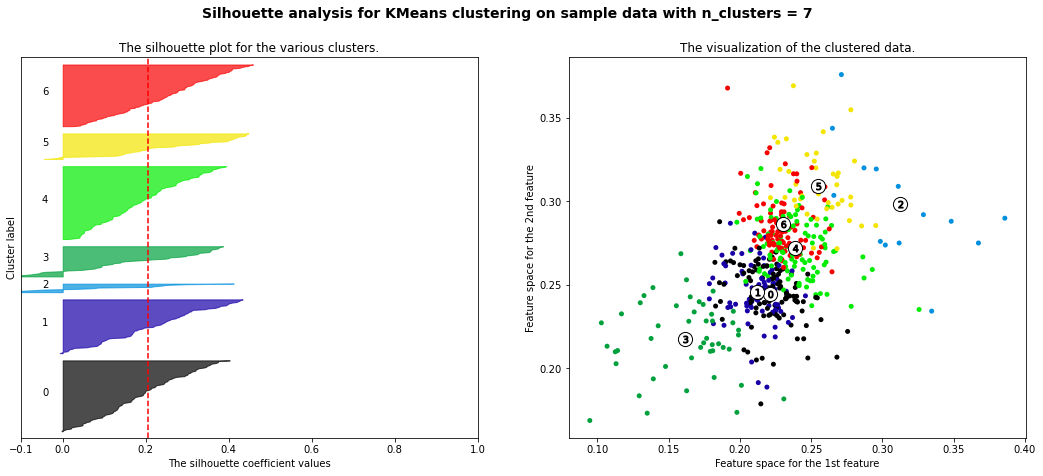

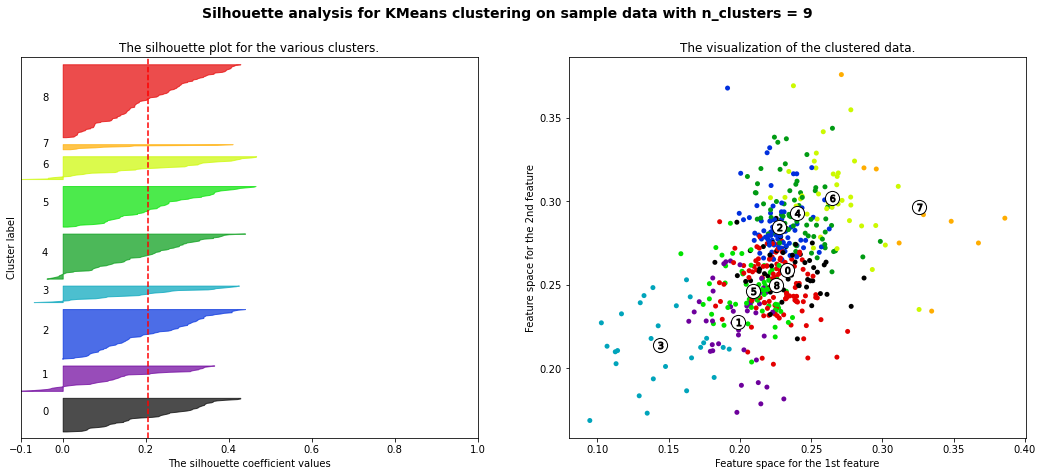

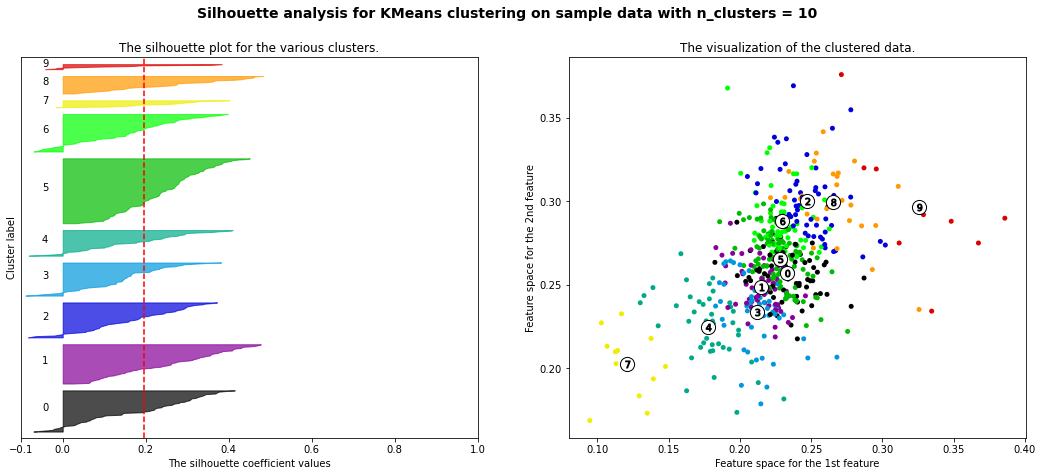

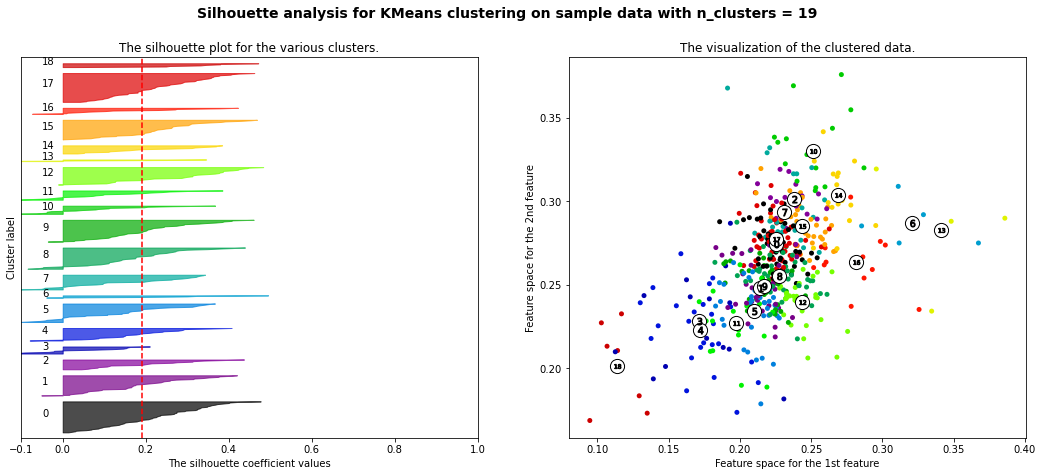

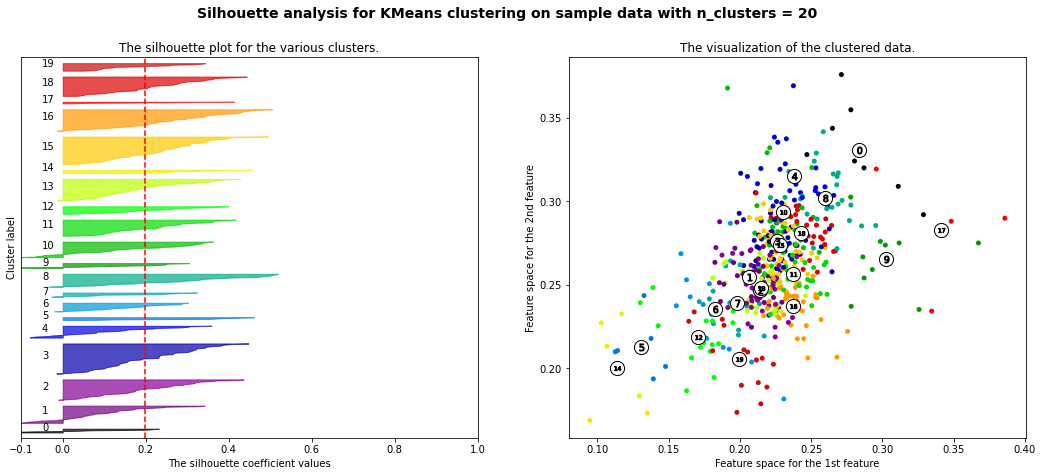

In [6]:
clustering_df = get_clustering_df(all_atms_feature_set, 'Special_Lunar_Dates_Index', 'CashIn')
range_n_clusters = list(range(2,8)) + list(range(9,11)) + list(range(19,21))
draw_silhouette(clustering_df, range_n_clusters)